In [1]:
from Data import Cases, Polygons, Labels
import matplotlib.pyplot as plt

Polygons.loadPolygonsMat()
# configure the plot sizes
plt.rcParams['figure.figsize'] = [15, 10]

### Hand Crafted Feature Activations

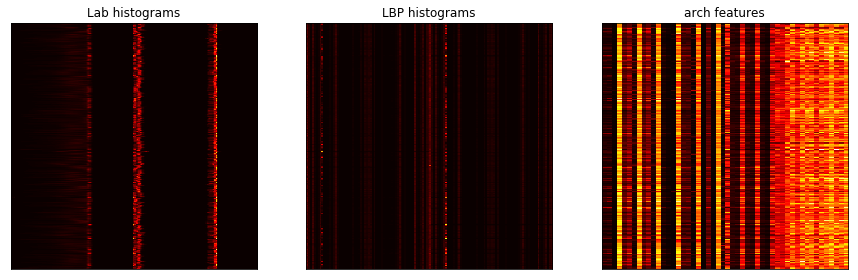

In [3]:
f, axs = plt.subplots(1, 3, sharey=False)
features = {'Lab histograms':Polygons.Lab_histograms,
            'LBP histograms':Polygons.LBP_histograms,
            'arch features': Polygons.arch_features}
for (i, (key,value)) in enumerate(features.items()):
    axs[i].imshow(value, extent=[0,1,0,1])
    plt.set_cmap('hot')
    axs[i].get_xaxis().set_visible(False)
    axs[i].get_yaxis().set_visible(False)
    axs[i].set_title(key)
plt.show()

In [5]:
from sklearn.cluster import KMeans
import numpy as np

# concatenate all three feature sets
data = np.concatenate([values for keys,values in features.items()], axis=1)
# some instances contain NaN features; weed them out.
nonMask = np.any(np.isnan(data), axis=1) == False
data = data[nonMask]

# perform kmeans clustering algorithm
NUM_CLASSES = 4
kmeans = KMeans(n_clusters=NUM_CLASSES, random_state=0).fit(data)
print([np.sum(kmeans.labels_ == i) for i in range(NUM_CLASSES)])

[3621, 3943, 3805, 5862]


### Convolutional  Neural Network Feature Activations

In [ ]:
# TODO...